# Project : Brazil Medical Appointments Data Analysis



Our focus is to look at a dataset containing information from 100k medical appointments in Brazil. The essence is to asses whether or not patients show up for their appointment. The dataset to be used for this study is obtained from Kaggle.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('no_show_appointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Wrangling

In [2]:
# To obtain some information about the dataframe that will help my analysis 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


From the information we have obtained above, there are a couple of problems with the dataset we need to look into which include the following.


-Appointment Day does not have the apropriate datatype
-Schedule Day also lacks apropriate datatype
-Typo in Hipertension , Handcap. We will need to correct this.
-We need to change the datatype for 'gender' and 'no-show' to categorical datatypes seperating between F & M and No & Yes respectively.
-There is also need to change the datatype for 'Scholarship' , 'Hipertension' , 'Diabetes' , 'Alcoholism' , 'Handcap' , 'SMS_received' has impropriates datatypes because they have just '0' & '1'.

In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the description obtained above, elderly patients of age 55 and above make up 75% of the patients eventhough the average age of 37.

In [4]:
# We will also like to check for duplication in the dataset
sum(df.duplicated())

0

An output of Zero (0) shows us that there is no duplicate in our dataset

In [5]:
# The name for the appointment column ends with 'ID', but for the patient column it ends with 'Id'.
df = df.rename(columns = {'PatientId': 'PatientID'})

In [6]:
# Let us also rename 'No-show' to 'No_show'. We are substituting the 'dash' with an 'underscore'
df = df.rename(columns = {'No-show' : 'No_show'})

In [7]:
# Since we are considering standard english spellings, we will rename the spelling error "Hipertension" to 'Hypertension'
df = df.rename(columns = {'Hipertension' : 'Hypertension'})

In [8]:
# We will also rename the spelling error 'Handcap' to 'Handicap'
df = df.rename(columns = {'Handcap' : 'Handicap'})

In [9]:
#To confirm renames done
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientID       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
# Let's convert 'Scholarship' Datatypes from Integer datatypes to Boolean datatypes
df['PatientID'] = df['PatientID'].astype('int64')

In [11]:
# Let's convert 'ScheduledDay' datas from String Datatypes to Datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [12]:
# Let's convert 'AppointmentDay' datas from String Datatype to Datetime datatype
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [13]:
# Let's convert the 'Gender' datatype from String to Categorical since it has only 'F' & 'M'
df['Gender'] = df['Gender'].astype('category')

In [14]:
#Let's confirm the unique values for gender
df.Gender.unique()

['F', 'M']
Categories (2, object): ['F', 'M']

In [15]:
# Let's convert 'Scholarship' Datatypes from Integer datatypes to Boolean datatypes
df['Scholarship'] = df['Scholarship'].astype('bool')

In [16]:
#We can confirm the conversion by
df['Scholarship'].dtype

dtype('bool')

In [17]:
# Let's onvert 'Hypertension' Datatypes from Integer to Boolean 
df['Hypertension'] = df['Hypertension'].astype('bool')

In [18]:
# Let's convert 'Diabetes' Datatypes from Integer to Boolean
df['Diabetes'] = df['Diabetes'].astype('bool')

In [19]:
# Let's convert 'Alcoholism' Datatypes from Integer  to Boolean
df['Alcoholism'] = df['Alcoholism'].astype('bool')

In [20]:
# Let's convert 'Handicap' Datatypes from Integer to Boolean
df['Handicap'] = df['Handicap'].astype('bool')

In [21]:
# Let's convert 'SMS' Datatypes from Integer to Boolean
df['SMS_received'] = df['SMS_received'].astype('bool')

In [22]:
# Let's convert 'SMS' Datatypes from Integer to Boolean
df['No_show'] = df['No_show'].astype('category')

Datatypes

let us check further to see if there are any incorrect data types or missing values

In [23]:
#To confirm conversion of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  category           
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  bool               
 8   Hypertension    110527 non-null  bool               
 9   Diabetes        110527 non-null  bool               
 10  Alcoholism      110527 non-null  bool               
 11  Handicap        110527 non-null  bool               
 12  SMS_received    110527 non-null  bool               
 13  No_show       

Every column has the same number of values as there are rows so there is no missing values. 

In [24]:
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No


So, now we have our headings with the appropriate spellings and also having the right datatype. We will then proceed to explore our data and make meaning out of it.

# EXPLORATORY DATA ANALYSIS
This is where we are going to explore the dataset. 
We have dependent variable and independent variable to look at.
The independent variables are Age, SMS_received and Scholarship and our dependent variable is No_show i.e patients who did not show up for the appointment.

# Reseach Question 1 : How does the age distribution relate to medical appointments scheduled?

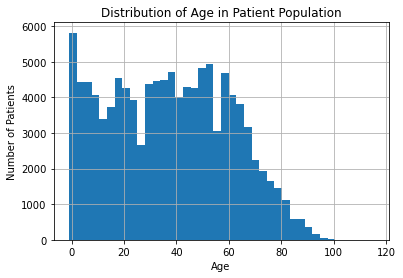

In [25]:
#We will plot a histogran to show the distribution of the patients by their ages

df.Age.hist(bins=40);

plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Distribution of Age in Patient Population');

From the chat above, the vast majority of patients are <=60 years old.
We will now divide our patient population into groups that will ease our analyss: Young (lesser than 30), middle aged (greater than or equals to 30 less tha 60) and old (60 and above). 
With this, we will find out if there are differences in the rate at which the variuos groups miss appointments.

In [26]:
#Let us now organize the ages into 3 categories of young, middle_age and old

young = df.query('Age < 30')
middle = df.query('Age >= 30 & Age < 60')
old = df.query('Age >= 60')

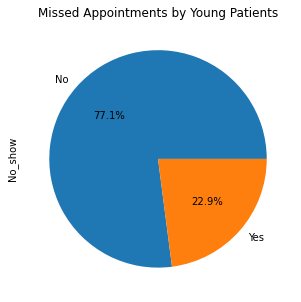

In [27]:
#Let us now organize the ages into 3 categories of young, middle age and old

def Pie_plot(arg1, arg2):
    arg1['No_show'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=[5,5],
                                            title=arg2);
Pie_plot(young, 'Missed Appointments by Young Patients')

From the pie chat above, we can observe that 22.9% of oung patients have missed their medical appointments where 77.1% were able to make it for the appoinment.

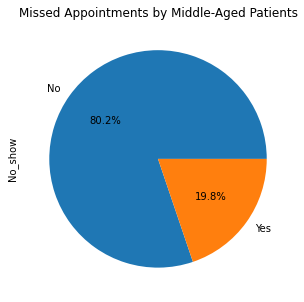

In [28]:
Pie_plot(middle, 'Missed Appointments by Middle-Aged Patients')

The middle-aged patients show a little improvement on the number of patients who missed their appointments.
About 19.8% of the middle-aged group and missed their appointments while 80.2% made it to the appointment.

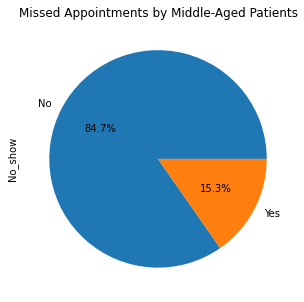

In [29]:
Pie_plot(old, 'Missed Appointments by Middle-Aged Patients')

About 15.3% of the elderly patients missed their medical appointment while a higher peprcentage of 84.7% did make it to the medical appointment. By this, the elderly patients category show a better response to medical appointments. Although this might not be entirely true as their might be other factors that favour their ability to make it to the appoinments which our data was not able to capture. This could be procimity to hospitals or even personal relationships with the physicians built over time could have prompted that.

# Research Question 2: Are patients who did not receive  SMS more likely to miss appointments?

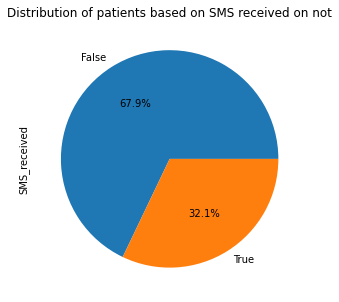

In [30]:
df['SMS_received'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribution of patients based on SMS received on not', figsize=[5,5]);

From here, we know that only 32% of patients received SMS reminders while the reminder of 67.9% do not. 

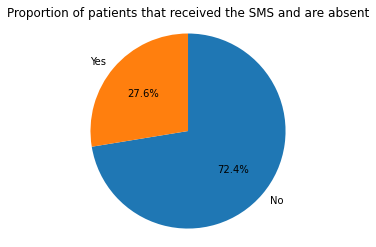

In [31]:
#Let us categoried the patients into two based on those who have received SMS and those who have not so we can relate that to the appointment (No_show). Where yes_SMS means they have received reminders and no_SMS means they never got SMS reminders 

yes_SMS = df.query('SMS_received == 1')
sorted_counts = yes_SMS['No_show'].value_counts()
plt.pie(sorted_counts,autopct='%1.1f%%',  labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');
plt.title('Proportion of patients that received the SMS and are absent');

Here we can observe that 27.6 % of patients that received the SMS did not show up for medical appointment while 72.4% of patients that received the SMS showed up for the medical appointments.

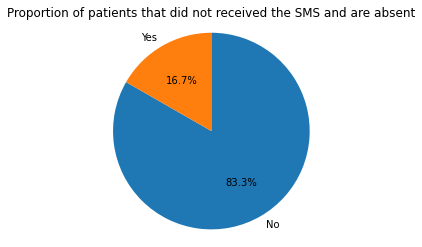

In [32]:
#For patients that did not receive SMS and are absent
no_SMS = df.query('SMS_received == 0')
sorted_counts = no_SMS['No_show'].value_counts()
plt.pie(sorted_counts,autopct='%1.1f%%', labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');
plt.title('Proportion of patients that did not received the SMS and are absent');

# Research Question 3 : Are people who received the Scholarship more likely to attend their medical appointments?

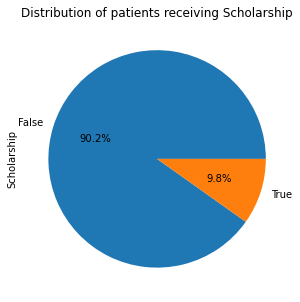

In [33]:
#Let's plot a chat of distribution of patients receinving scholarship

df['Scholarship'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribution of patients receiving Scholarship', figsize=[5,5]);

Only about 9.8% of patients received Scholarship while 90.2% did not received. Let's us now find out of receiving scholarship contributes to them not missing their appointments.

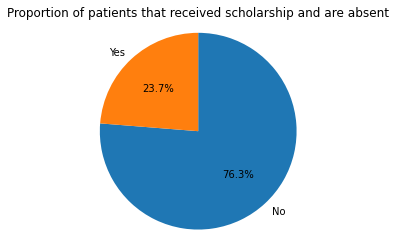

In [34]:
#Lets see the percentage of patients that recived scholarship and still could not make it to their appointments. yes_Scholarship means they received scholarship

yes_Scholarship = df.query('Scholarship == 1')
sorted_counts = yes_Scholarship['No_show'].value_counts()
plt.pie(sorted_counts,autopct='%1.1f%%', labels = sorted_counts.index, startangle = 90,
        counterclock = False)
plt.axis('square');
plt.title('Proportion of patients that received scholarship and are absent');

On observation, 76.3% of patients are present when they have received Scholarship while 23.7% of patients are absent.

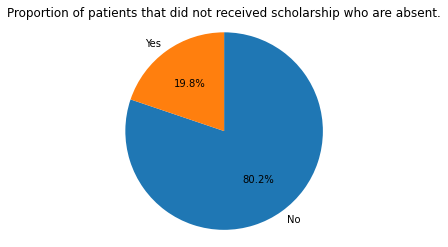

In [35]:
#Lets see the percentage of patients that did not recived scholarship and did not make it to their appointments. no_Scholarship means they did not received scholarship

no_Scholarship = df.query('Scholarship == 0')
sorted_counts = no_Scholarship['No_show'].value_counts()
plt.pie(sorted_counts,autopct='%1.1f%%', labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square');
plt.title('Proportion of patients that did not received scholarship who are absent.');

On observation, 80% of patients who did not receive scholarship did not miss their appointment. A 19.8% of those who did not receive scholarship are absent.

# Conclusion
Here we have done exploratory analysis using statitistics , charts and graphs to investigate the questions that we presented. We have discovered various findings that are suprising while some are expected that would navigate us towards a better decision of practical implications.

# Reseach Question 1 : How does the age distribution relate to medical appointments scheduled?
We categorised the patiets by age into three groups. The majority of patients are young (under 30) or middle-aged (between 30 and 60) while the elderly make up 60 and above as the histogram illustrated. 

The elderly patients over 60 were least likely to miss appointments (15.3%), and middle-aged people were in between (19.8%) with the young patients having a higher likelihood of missing their appointments (22.9%). 

By this, the elderly patients category show a better response to medical appointments. Although this might not be entirely true as their might be other factors that favour their ability to make it to the appoinments which our data was not able to capture. This could be procimity to hospitals or even personal relationships with the physicians built over time could have prompted that.


# Research Question 2: Are patients who did not receive SMS more likely to miss appointments?

Suprisingly, we observed that patients who did not received SMS have a higher percentage of patients that attend the medical appointments with 83.3% than patients that received SMS with 72.4%. Could this mean that people who did not receive reminders are likely to not miss their appointments? From our analysis,  above, yes. Maybe if we get more variables, we will need to know whether the receipt of SMS reminders has in a way affected the patients' likelihood in missing their appointments. 


# Research Question 3 : Are people who received the Scholarship more likely to attend the appointment?

The patients who did not receive scholaship have a higher percentage of patients that attend the medical appointments with 80.2% than patients that received scholaship with 76.3%. This will imply that given scholarhsip has little to contribute in making patients not to miss their appointments.


# Further Research

Other things we can explore from our dataset are;

Consider the gap between when appointment are made and the scheduled time, does a larger gap increase the likelihood of missing appointments?

We can look at whether certain gender increases the chance of patients to miss the medical appointment?

We need more information on 'scholarship', how does it affect patients likelihood of missing appontment?

We can also look at patients with multiple diseases. Does that increasees their chance of missing the medical appointment?

